In [1]:
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("mako")

In [2]:
train_data = pd.read_csv("data/Leaf_Classification/train.csv")
result_data = pd.read_csv("data/Leaf_Classification/test.csv")

In [3]:
train_data.head(5)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,margin41,margin42,margin43,margin44,margin45,margin46,margin47,margin48,margin49,margin50,margin51,margin52,margin53,margin54,margin55,margin56,margin57,margin58,margin59,margin60,margin61,margin62,margin63,margin64,shape1,shape2,shape3,shape4,shape5,shape6,shape7,shape8,shape9,shape10,shape11,shape12,shape13,shape14,shape15,shape16,shape17,shape18,shape19,shape20,shape21,shape22,shape23,shape24,shape25,shape26,shape27,shape28,shape29,shape30,shape31,shape32,shape33,shape34,shape35,shape36,shape37,shape38,shape39,shape40,shape41,shape42,shape43,shape44,shape45,shape46,shape47,shape48,shape49,shape50,shape51,shape52,shape53,shape54,shape55,shape56,shape57,shape58,shape59,shape60,shape61,shape62,shape63,shape64,texture1,texture2,texture3,texture4,texture5,texture6,texture7,texture8,texture9,texture10,texture11,texture12,texture13,texture14,texture15,texture16,texture17,texture18,texture19,texture20,texture21,texture22,texture23,texture24,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,0.037109,0.019531,0.000000,0.009766,0.021484,0.015625,0.007812,0.013672,0.027344,0.062500,0.000000,0.017578,0.031250,0.0,0.044922,0.007812,0.025391,0.003906,0.013672,0.015625,0.013672,0.003906,0.005859,0.003906,0.019531,0.001953,0.000647,0.000609,0.000576,0.000553,0.000516,0.000496,0.000474,0.000453,0.000454,0.000429,0.000418,0.000410,0.000406,0.000398,0.000399,0.000389,0.000399,0.000416,0.000414,0.000430,0.000422,0.000437,0.000452,0.000467,0.000470,0.000484,0.000489,0.000490,0.000475,0.000486,0.000484,0.000500,0.000513,0.000511,0.000519,0.000513,0.000502,0.000498,0.000487,0.000471,0.000458,0.000440,0.000436,0.000427,0.000394,0.000385,0.000382,0.000370,0.000367,0.000373,0.000386,0.000389,0.000391,0.000414,0.000422,0.000434,0.000452,0.000471,0.000485,0.000512,0.000536,0.000553,0.000610,0.000660,0.049805,0.017578,0.003906,0.024414,0.001953,0.010742,0.035156,0.007812,0.039062,0.062500,0.000000,0.000000,0.007812,0.007812,0.0,0.0,0.047852,0.0,0.054688,0.022461,0.0,0.000977,0.018555,0.001953,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,0.033203,0.019531,0.031250,0.009766,0.007812,0.031250,0.001953,0.039062,0.029297,0.031250,0.035156,0.000000,0.007812,0.0,0.046875,0.046875,0.029297,0.009766,0.017578,0.007812,0.013672,0.019531,0.000000,0.000000,0.003906,0.000000,0.000749,0.000695,0.0

In [26]:
image_label_dict = dict(zip(train_data.id, train_data.species))

In [4]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,990.0,799.595960,452.477568,1.000000,415.250000,802.500000,1195.500000,1584.000000
margin1,990.0,0.017412,0.019739,0.000000,0.001953,0.009766,0.025391,0.087891
margin2,990.0,0.028539,0.038855,0.000000,0.001953,0.011719,0.041016,0.205080
margin3,990.0,0.031988,0.025847,0.000000,0.013672,0.025391,0.044922,0.156250
margin4,990.0,0.023280,0.028411,0.000000,0.005859,0.013672,0.029297,0.169920
margin5,990.0,0.014264,0.018390,0.000000,0.001953,0.007812,0.017578,0.111330
margin6,990.0,0.038579,0.052030,0.000000,0.000000,0.015625,0.056153,0.310550
margin7,990.0,0.019202,0.017511,0.000000,0.005859,0.015625,0.029297,0.091797
margin8,990.0,0.001083,0.002743,0.000000,0.000000,0.000000,0.000000,0.031250
margin9,990.0,0.007167,0.008933,0.000000,0.001953,0.005859,0.007812,0.076172


In [5]:
def create_feature_boxplots(prefix, log_scale=False):
    margin_columns = list(filter(lambda x: x.startswith(prefix), map(lambda x: str(x), list(train_data.columns))))    
    df = train_data[margin_columns]
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df)
    plt.legend([])
    if log_scale:
        plt.yscale('log')
    plt.xticks(rotation=90)
    
    plt.title(f"Combined Boxplot for 64 {prefix} features")
    plt.xlabel("Feature")
    plt.ylabel("Value")
    
    plt.tight_layout()
    plt.show()

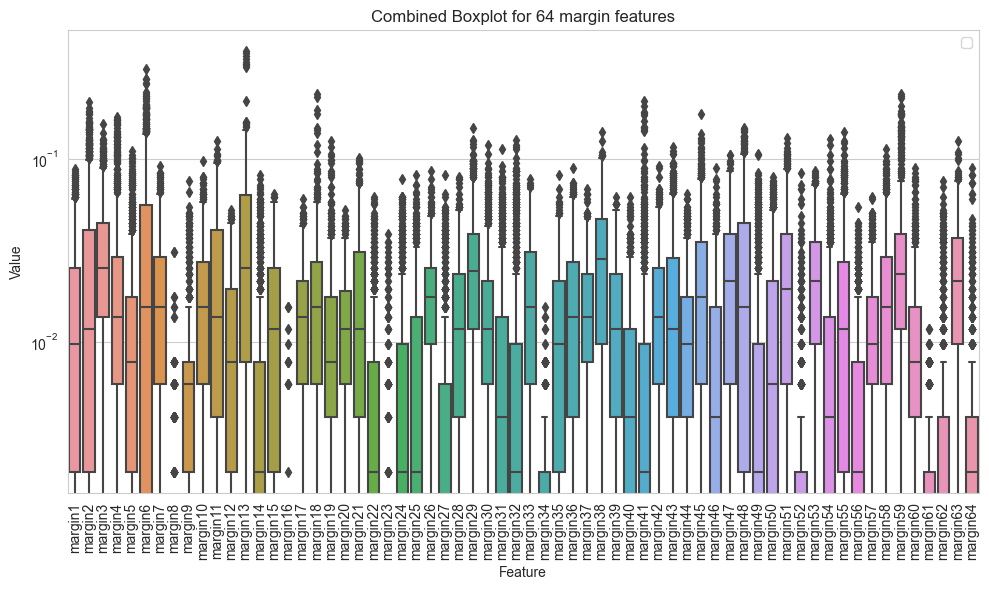

In [6]:
create_feature_boxplots("margin", True)

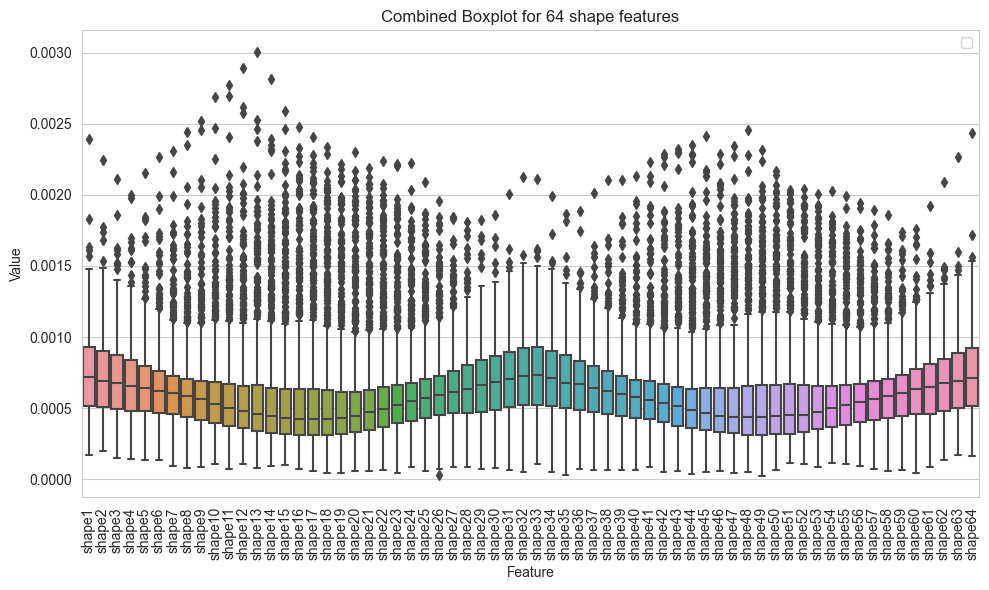

In [7]:
create_feature_boxplots("shape", False)

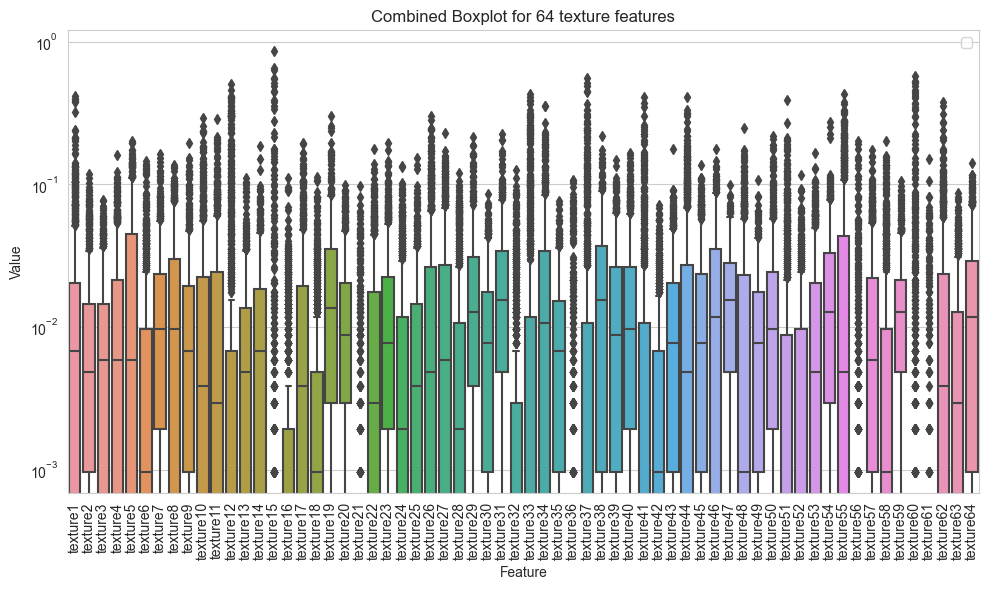

In [8]:
create_feature_boxplots("texture", True)

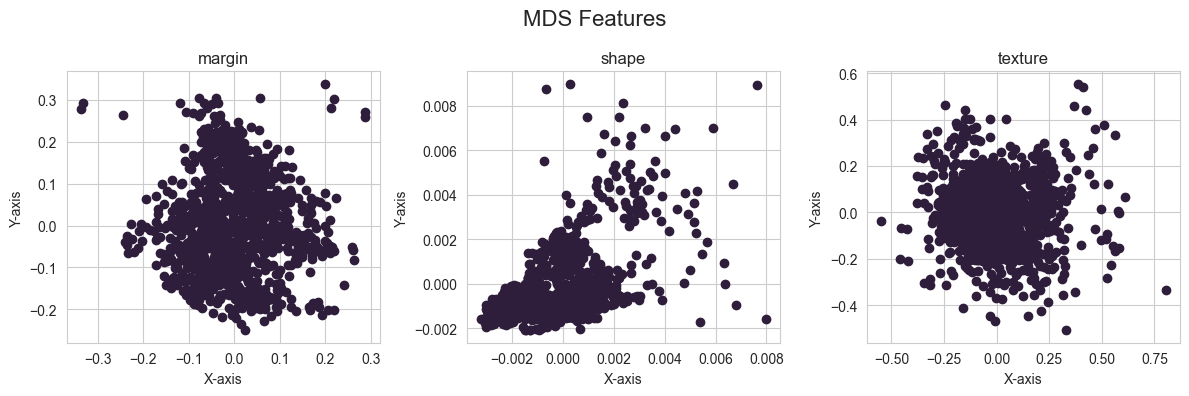

In [9]:
from sklearn import manifold

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
fig.suptitle("MDS Features", fontsize=16)
axes = axes.flatten()

for idx, prefix in enumerate(["margin", "shape", "texture"]):
    margin_columns = list(filter(lambda x: x.startswith(prefix), map(lambda x: str(x), list(train_data.columns))))    
    df = train_data[margin_columns] 
    embedding = manifold.MDS(n_components=2, normalized_stress='auto')
    X_transformed = embedding.fit_transform(df)
    axes[idx].scatter(X_transformed[:, 0], X_transformed[:, 1])
    axes[idx].set_xlabel('X-axis')
    axes[idx].set_ylabel('Y-axis')
    axes[idx].set_title(f'{prefix}')
plt.tight_layout()
plt.show()

In [59]:
import glob
import torch
from torch.utils.data import DataLoader, Dataset
import re
from PIL import Image
from torchvision import transforms

In [113]:
class ImageDataset(Dataset):
    def __init__(self, mode):
        self.files = glob.glob("data/Leaf_Classification/images/*")
        self.labels = image_label_dict
        self.indices = list(self.labels.keys())
        self.mode = mode
        self.transformations = transforms.Compose([transforms.PILToTensor()])

    def __len__(self):
        return len(self.files)

    def load_PIL_image(self, idx):
        idx = self.indices[idx]
        file = self.files[idx]
        pandas_idx = int(re.findall(r'\d+', file)[0])
        label = self.labels[pandas_idx]
        image = Image.open(file)
        return image, label

    def __getitem__(self, idx):
        image, label = self.load_PIL_image(idx)
        image = self.transformations(image)
        return image, label

In [114]:
t = ImageDataset(mode="train")
image, label = t.load_PIL_image(10)

In [115]:
def plot_samples_images(rows, cols, indices):
    fig = plt.figure(figsize=(10, 7))

    for idx, img_idx in enumerate(indices):
        fig.add_subplot(rows, cols, idx+1)
        image, label = t.load_PIL_image(img_idx)
        plt.imshow(image)
        plt.title(label)
        plt.axis('off')
    plt.show()

KeyError: 1008

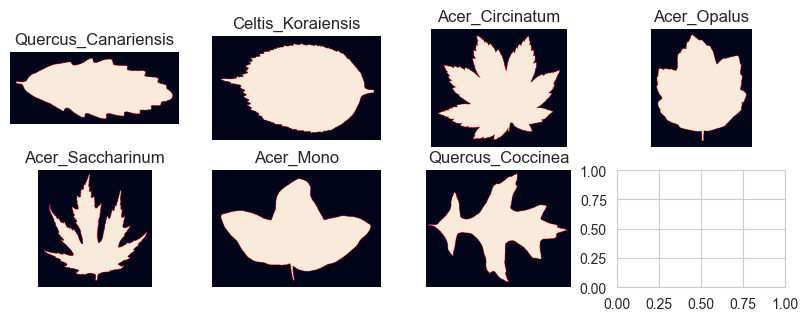

In [116]:
plot_samples_images(4, 4, list(range(16)))

#### Display sample images

#### Data Augmentation